In [ ]:
from boilercv.docs import _, init

init()

In [ ]:
import pandas as pd
import seaborn as sns
import trackpy as tp
from matplotlib import pyplot as plt

from boilercv.data import IDX, VIDEO, YPX
from boilercv.data.sets import get_contours_df, get_dataset
from boilercv.images import scale_bool
from boilercv.images.cv import Op, Transform, transform

# Tracks

Bubble tracks.


In [ ]:
EXAMPLE_UNOBSRUCTED_VIDEO = "2021-01-14T13-46-01"
frame = slice(0, 10)
ds = get_dataset(EXAMPLE_UNOBSRUCTED_VIDEO, stage="filled", frame=frame)

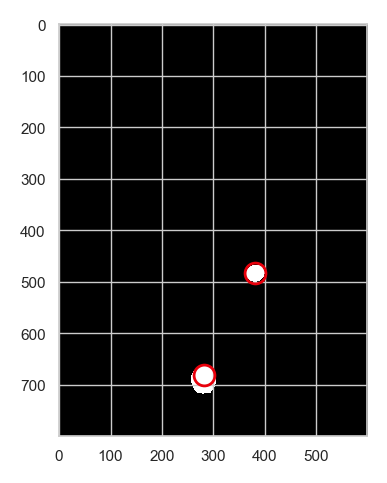

In [ ]:
first_frame = scale_bool(ds[VIDEO].sel(frame=0)).values
first_frame = transform(first_frame, Transform(Op.erode, 7))
objects = tp.locate(first_frame, diameter=51)
tp.annotate(objects, first_frame)

_

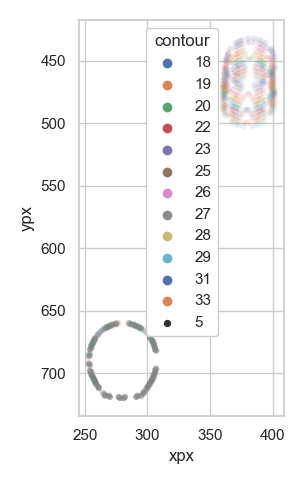

In [ ]:
from warnings import catch_warnings

frames = IDX[0:50, :]
df = (
    get_contours_df(EXAMPLE_UNOBSRUCTED_VIDEO)
    .loc[pd.IndexSlice[frame, :, :], :]
    .assign(
        **{
            "count": lambda df: df.loc[IDX[:, :], :]
            .groupby(level=("frame", "contour"))
            .count()[YPX]
        }
    )
)
df = df[df["count"] > 40].drop(columns="count")
first_frame_contours = df.loc[frames, ["xpx", "ypx"]]
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.set_aspect("equal")

with catch_warnings(category=UserWarning, action="ignore"):
    sns.scatterplot(
        ax=ax,
        data=first_frame_contours,
        x="xpx",
        y="ypx",
        hue="contour",
        size=5,
        edgecolor="none",
        alpha=0.1,
        palette=sns.color_palette("deep"),
    )

## References

```{footbibliography}

```
